In [1]:
import cobra.io
from cobra.io import read_sbml_model
import model_methods

# Table of Contents
1. [Single knock out](#Single-gene-knockout)
2. [Main pathway viability](#Knockout-entrance-to-both-pathways-to-check-viability-of-each)
3. [Side reaction knockout](#Check-side-reactions-for-the-example-of-chorismate)

In [4]:
# import model
model_base = model_methods.get_base_model()
model = model_methods.update_medium(model_base)

C:\Users\max44\anaconda3\lib\site-packages\cobra\core\model.py:787: UserWarning: SEPHCHCS not in iNF517
  warn(f"{reaction} not in {self}")
C:\Users\max44\anaconda3\lib\site-packages\cobra\core\model.py:787: UserWarning: SHCHCS3 not in iNF517
  warn(f"{reaction} not in {self}")
C:\Users\max44\anaconda3\lib\site-packages\cobra\core\model.py:787: UserWarning: DHNCOAS not in iNF517
  warn(f"{reaction} not in {self}")
C:\Users\max44\anaconda3\lib\site-packages\cobra\core\model.py:787: UserWarning: NPHS_c not in iNF517
  warn(f"{reaction} not in {self}")
C:\Users\max44\anaconda3\lib\site-packages\cobra\core\model.py:787: UserWarning: DHNAOT7 not in iNF517
  warn(f"{reaction} not in {self}")
C:\Users\max44\anaconda3\lib\site-packages\cobra\core\model.py:787: UserWarning: AMMQT7 not in iNF517
  warn(f"{reaction} not in {self}")


## Single gene knockout

In [3]:
#define objective of optimization
#model.add_boundary(model.metabolites.mqn7_c, type='demand')
#model.objective = model.reactions.DM_mqn7_c

In [4]:
import matplotlib.pyplot as plt

# Dictionary to store results
production_rates = {}
# Iterate over each gene and perform single gene deletion
for gene in model.genes:
    with model:
        gene.knock_out()
        solution = model.optimize()
        if solution.status == 'infeasible':
            # Record infeasible solutions as 0
            production_rates[gene] = 0
        elif solution.status == 'optimal':
            production_rates[gene] = solution.objective_value

C:\Users\max44\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\max44\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\max44\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\max44\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\max44\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\Users\max44\anaconda3\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
C:\U

Creating a graph indicating the effect on single knock out on production
knock outs, where the production is partially decreased are highlighted and saved for later use
as: highlighted_genes

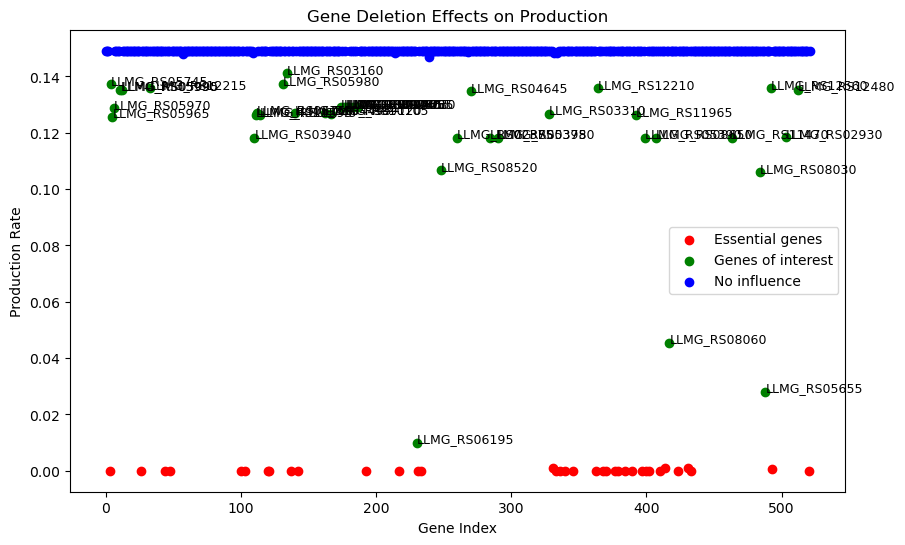

In [5]:
import matplotlib.pyplot as plt

# Initialize lists for plotting
vital_gene_indexes = []
vital_rates = []
highlighted_gene_indexes = []
highlighted_rates = []
highlighted_genes = []  # List to store highlighted genes
nochange_gene_indexes = []
nochange_rates = []

# Create scatter plot
plt.figure(figsize=(10, 6))

# Find the maximum rate for the threshold calculation
max_rate = max(production_rates.values())

# Iterate through the dictionary for plotting and labeling
for index, (gene, rate) in enumerate(production_rates.items()):
    # Append data for scatter plot
    if 0.01* max_rate <= rate <= 0.95 * max_rate:
        # Label, highlight, and store genes within the specified range
        plt.text(index, rate, gene.id, fontsize=9)
        highlighted_gene_indexes.append(index)
        highlighted_rates.append(rate)
        highlighted_genes.append(gene)  # Save the gene object
    elif rate <= 0.01 * max_rate:
        vital_gene_indexes.append(index)
        vital_rates.append(rate)
    else:
        nochange_gene_indexes.append(index)
        nochange_rates.append(rate)

# Scatter plot
plt.scatter(vital_gene_indexes, vital_rates, color='red')
plt.scatter(highlighted_gene_indexes, highlighted_rates, color='green')  # Different color for highlighted points
plt.scatter(nochange_gene_indexes, nochange_rates, color='blue')

# Add labels and title
plt.xlabel('Gene Index')
plt.ylabel('Production Rate')
plt.title('Gene Deletion Effects on Production')

plt.legend(["Essential genes", "Genes of interest", "No influence"])

# Show plot
plt.show()

### Knockout entrance to both pathways to check viability of each

In [6]:
# Mevalonate pathway gene: LLMG_RS04740
# Shikimate pathway gene: LLMG_RS09700

# productivity with both pathways
with model:
    solution = model.optimize().objective_value
    print(f"Productivity with both pathways: {solution}")

# knock out Mevalonate pathway and check productivity
with model:
    model.genes.get_by_id("LLMG_RS04740").knock_out()
    solution = model.optimize().objective_value
    print(f"Productivity without Mevalonate pathway: {solution}")

# knock out Shikimate pathway
with model:
    model.genes.get_by_id("LLMG_RS09700").knock_out()
    solution = model.optimize().objective_value
    print(f"Productivity without Shikimate pathway: {solution}")

Productivity with both pathways: 0.14913818493150685
Productivity without Mevalonate pathway: -4.554322805053897e-17
Productivity without Shikimate pathway: 6.959808860006195e-17


### Check side reactions for the example of chorismate

In [7]:
# Check chorismate side reactions
# Wanted reaction: LLMG_RS09155
chorismate = model.metabolites.get_by_id("chor_c") #edit here
side_reactions = []

# check all reactions
for reaction in chorismate.reactions:
    side_reactions.extend(reaction.gene_reaction_rule.split(' and '))

print("Essential genes: LLMG_RS09155 and LLMG_RS09680")
for gene in side_reactions:
    with model:
        model.genes.get_by_id(gene).knock_out()
        solution = model.optimize().objective_value
        print(f"Productivity without {gene}: {solution}")

Essential genes: LLMG_RS09155 and LLMG_RS09680
Productivity without LLMG_RS05235: 0.14913818493150677
Productivity without LLMG_RS05240: 0.14913818493150705
Productivity without LLMG_RS05855: 0.14913818493150705
Productivity without LLMG_RS05860: 0.14913818493150705
Productivity without LLMG_RS09155: 5.710262418489322e-18
Productivity without LLMG_RS12465: 0.14913818493150663
Productivity without LLMG_RS09680: -2.2841049673957293e-17


As already seen from the single knock outs, there are no side reactions competing with the expression of the product.